Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]


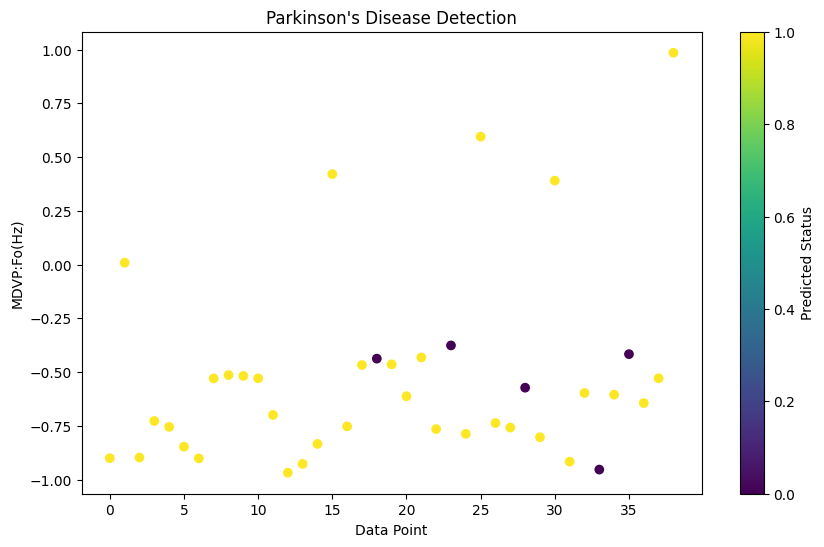

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


data = pd.read_csv("/content/Parkinsson disease.csv")


features = data.loc[:, data.columns != 'status'].values[:, 1:]
labels = data.loc[:, 'status'].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)


print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)


feature_column = 1

plt.figure(figsize=(10, 6))
plt.scatter(range(len(X_test)), X_test[:, feature_column], c=predictions, cmap='viridis')
plt.xlabel('Data Point')
plt.ylabel('MDVP:Fo(Hz)')
plt.title("Parkinson's Disease Detection")
plt.colorbar(label='Predicted Status')
plt.show()
